# Simulation of the Luria-Delbrück Experiment

(c) 2016 Griffin Chure. This work is licensed under a [Creative Commons Attribution License CC-BY 4.0](https://creativecommons.org/licenses/by/4.0/). All code contained herein is licensed under an [MIT license](https://opensource.org/licenses/MIT)

In [9]:
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('notebook')
%matplotlib inline

## Adaptive mutation

In this model, a certion proportion of cells will mutate upon exposure to some toxic substance (i.e. antibiotic) and will become resistant. This mutaiton will only be experienced by that cell and the trait will not be passed to others in the population. To begin wthe simulation, we will first define some necessary parameters. For the case of the adaptive immunity, we'll have to ddfine the rate at which the cells will mutate, the total number of cells in the population, and the number of simulations to run.

In [10]:
# Define some of the simulation parameters
n_sim = 1000
n0_cells = 100
n_gen = 10 
total_cells = n0_cells * 2**n_gen
mut_rate = 1E-5  # Probability of a cell mutating under a selection pressure

Since we won't have to worry about tracking which cells have already mutated, we can simply flip a coin for each cell immediately before being exposed to selection. If the cell is lucky, it will mutate and fufill its biological duty. If not, oh well. To do the simulation, we simply have to iterate through each cell in each of our simulations and draw a random number. If the random number is below that which we defined as the `mut_rate`, we will count it as a mutated cell. 

In [11]:
# Make an empty vector to store the number of mutants in each simulation.
adap_muts = np.empty(n_sim)
for i in range(n_sim):    
    # Flip a coin for each cell
    flips = np.random.rand(total_cells)
    
    # Sum the number of mutants.
    adap_muts[i] = np.sum(flips < mut_rate)  

That's it! We've simulated an experiment `1000` times. How should we examine the distribution? Let's make a histogram of the number of mutants in each simulation.

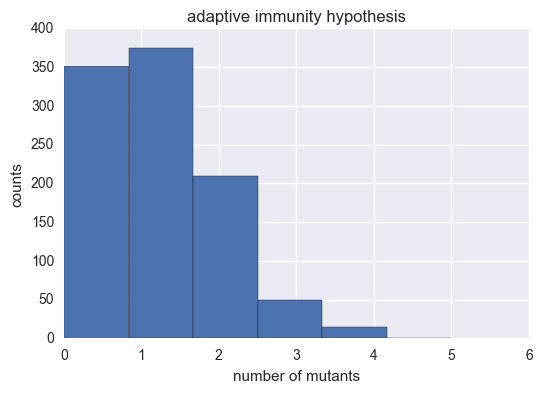

In [21]:
# Generate the histogram of mutants.
_ = plt.hist(adap_muts, bins=6)
plt.xlabel('number of mutants')
plt.ylabel('counts')
plt.title('adaptive immunity hypothesis')

That's a pretty narrrow distribution! At most, it looks like we sonly have 5 - 6 mutants throughout the whole simulation. The most telling way to examine the properties of the distribution is to look at some of the statistics. If mutation were truly random and adaptive, one would expect a binomial distribution of mutants given a large number of cells and a low mutation rate. We can tell through the statistics of the binomial distribution that the variance divided by the mean (known as the Fano factor) should be unity. Let's compute the mean, variance, and Fano factor of our distribution to assess whether it is binomial. 

In [22]:
# Print some statistics.
adap_mean = np.mean(adap_muts)
adap_var = np.var(adap_muts)
adap_fano = adap_var / adap_mean

print("""
For the adaptive case....
-------------------------
The mean number of mutants is {0:.3f}.
The variance in number of mutants is {1:.3f}.
The Fano factor (variance / mean) is {2:.3f}.
""".format(adap_mean, adap_var, adap_fano))


For the adaptive case....
-------------------------
The mean number of mutants is 1.004.
The variance in number of mutants is 0.902.
The Fano factor (variance / mean) is 0.898.



We see that the Fano factor is very close to one and there are very few mutants. How does this change for the acquired immunity case?

## Acquired Immunity

 Under the acquired immunity case, we have to be a little more careful. In this model, cells can mutate at **any point** in the growth of the culture. Cultures which happen to have a mutation early on their growth (known as a 'jackpot') will have a very large number of mutants by the end of the growth. If this model were true, we would expect that our distribution would have *very* long tails and therefore, a Fano factor much greater than one. To write this simulation, we'll need some way to track whether cells have been mutated or not, so we will have to loop through each generation as well. 

In [23]:
acq_muts = np.empty(n_sim)
for i in range(n_sim):
    # Generate an initial vector of cells
    cells = np.zeros(n0_cells)
   
    # Loop through each generation 
    for j in range(n_gen):
        
        # Make the new cells
        daughters = np.copy(cells)
        
        # Flip coins to figure out who has mutated
        new_muts = np.random.rand(len(cells)) < mut_rate
        
        # Check if the parent cell is mutated. If it is, adding the two vectors
        # will create a value > 0.
        daughters = (daughters + new_muts) > 0
        
        # Merge the daughers and the mothers into one vector to start over. 
        cells = np.concatenate((daughters, cells))
        
    # Determine the number of mutants for each simulation.  
    acq_muts[i] = np.sum(cells) 

Again, the best way to assess the distribution is to take a look at it and print out some statistics.


For the acquired immunity case....
----------------------------------
The mean number of mutants is 4.967.
The variance in number of mutants is 642.212.
The Fano factor (variance/mean) is 129.296.



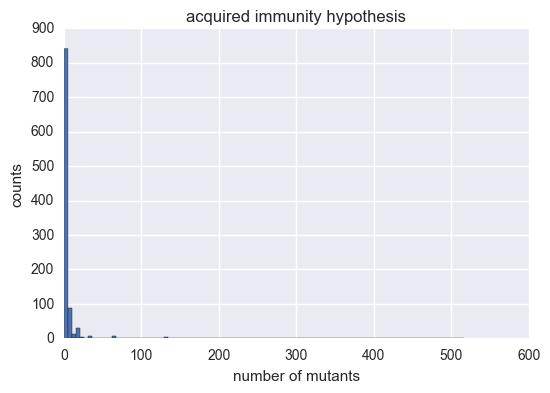

In [24]:
# Generate the histogram.
_ = plt.hist(acq_muts, bins=100)
plt.xlabel('number of mutants')
plt.ylabel('counts')
plt.title('acquired immunity hypothesis')

# Print out the statistics.
acq_mean = np.mean(acq_muts)
acq_var = np.var(acq_muts)
acq_fano = acq_var / acq_mean
print("""
For the acquired immunity case....
----------------------------------
The mean number of mutants is {0:.3f}.
The variance in number of mutants is {1:.3f}.
The Fano factor (variance/mean) is {2:.3f}.
""".format(acq_mean, acq_var, acq_fano))



Wow! That is a huge Fano factor, which is exactly what we would have predicted. 

##  Optimized functions.

In [16]:
fast_muts = np.sum(np.random.rand(n_sim, total_cells) < mut_rate, axis=1)
var_fast = np.var(fast_muts)
mean_fast = np.mean(fast_muts)
fano_fast = var_fast / mean_fast
print(fano_fast)

0.980954296161


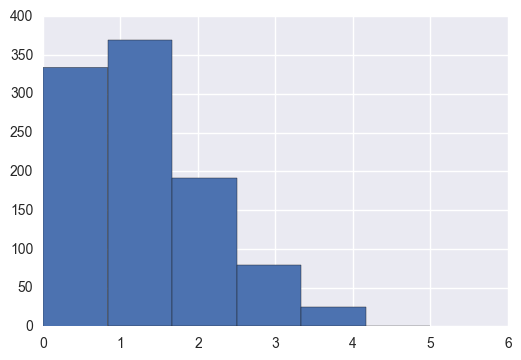

In [17]:
_ = plt.hist(fast_muts, bins=6)

##  Acquired immunity case

In [18]:
acq_vec = np.zeros(n_sim)
for i in range(n_gen):
    new_muts = np.sum(np.random.rand(n_sim, n0_cells * 2**i) < mut_rate, axis=1)
    acq_vec[acq_vec == 0] += new_muts[acq_vec == 0]
    acq_vec[acq_vec > 0]  *= 2 

200.718829048


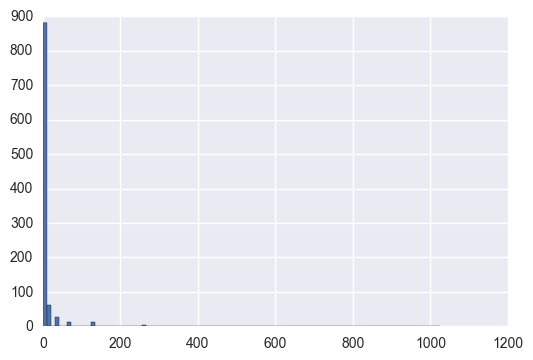

In [19]:
_ = plt.hist(acq_vec, bins=100)
fast_acq_var = np.var(acq_vec)
fast_acq_mean = np.mean(acq_vec)
print(fast_acq_var / fast_acq_mean)